<a href="https://colab.research.google.com/github/tensorflow-project/FineTuning/blob/main/training_for_two_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tensorflow-project/FineTuning

Cloning into 'FineTuning'...
remote: Enumerating objects: 627, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 627 (delta 176), reused 141 (delta 90), pack-reused 364
Receiving objects: 100% (627/627), 97.44 MiB | 29.31 MiB/s, done.
Resolving deltas: 100% (442/442), done.


In [2]:
import sys
import os
import numpy as np
from google.colab import drive

py_file_location = "/content/FineTuning"
sys.path.append(os.path.abspath(py_file_location))
py_file_location = "/content/FineTuning/models"
sys.path.append(os.path.abspath(py_file_location))

import textual_inversion_two_concepts as txt
     


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
13911/13911 [==============================] - 0s 0us/step


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


492466864/492466864 [==============================] - 10s 0us/step
49408
(49409, 768)
(49410, 768)
198180272/198180272 [==============================] - 1s 0us/step
[[TensorShape([49411, 768])], [], []]
136824240/136824240 [==============================] - 1s 0us/step
(768,)


Mounted at /content/drive


In [ ]:
txt.trainer.fit(
    txt.train_ds,
    epochs=1,
)


 94/220 [===========>..................] - ETA: 3:19 - loss: 0.0205

In [ ]:
drive.mount("/content/drive")
path = '/content/drive/MyDrive/weights_with_two_concepts.npy'

In [ ]:
###get the weights of the text encoder and save the to google drive
text_encoder_weights = np.array(txt.stable_diffusion.text_encoder.get_weights())

### Save the weights array to a file on your Google Drive
np.save(path, text_encoder_weights)

In [ ]:
txt.percentage_emoji(0.2)

In [ ]:
broccoli = []

In [ ]:
#stable_diffusion.tokenizer.add_tokens(placeholder_token_combined)

placeholder_tokenized = stable_diffusion.tokenizer.encode(placeholder_token_combined)[1]
broccoli_tokenized = stable_diffusion.tokenizer.encode(placeholder_token_broccoli)[1]
emoji_tokenized = stable_diffusion.tokenizer.encode(placeholder_token_emoji)[1]


broccoli_embeddings = stable_diffusion.text_encoder.layers[2].token_embedding(tf.constant(broccoli_tokenized))
print(broccoli_embeddings.shape)
broccoli.append(broccoli_embeddings)
emoji_embeddings = stable_diffusion.text_encoder.layers[2].token_embedding(tf.constant(emoji_tokenized))

combined_weights = broccoli_embeddings + (0.05*(emoji_embeddings - broccoli_embeddings))
old_weights = stable_diffusion.text_encoder.layers[2].token_embedding.get_weights()
#old_position_weights = stable_diffusion.text_encoder.layers[2].position_embedding.get_weights()

old_weights = old_weights[0]
old_weights[-1] = combined_weights
print(len(old_weights))
#combined_weights = np.expand_dims(combined_weights, axis=0)
#print(combined_weights.shape)
#combined_weights = np.concatenate([old_weights, combined_weights], axis=0)
stable_diffusion.text_encoder.layers[2].token_embedding.set_weights([old_weights])


(768,)
49411


In [ ]:
print(combined_weights.shape)

(768,)


In [ ]:
def cosine_sim(e1, e2):
  sim = dot(e1, e2)/(norm(e1)*norm(e2))
  print(sim)
  return sim

In [ ]:

"""
### use the tokenizer to encode the placeholder token and the token we built it up on (in this case broccoli)
broccoli_tokenized = stable_diffusion.tokenizer.encode("broccoli")[1]
placeholder_tokenized = stable_diffusion.tokenizer.encode(placeholder_token_broccoli)[1]
combined_tokenized = stable_diffusion.tokenizer.encode(placeholder_token_combined)[1]
emoji_tokenized = stable_diffusion.tokenizer.encoder(placeholder_token_emoji)[1]

### Get the embeddings for the tokens
broccoli_embedding = stable_diffusion.text_encoder.layers[2].token_embedding(tf.constant(broccoli_tokenized))
placeholder_embedding = stable_diffusion.text_encoder.layers[2].token_embedding(tf.constant(placeholder_tokenized))
combined_embedding = stable_diffusion.text_encoder.layers[2].token_embedding(tf.constant(combined_tokenized))
emoji_embedding = stable_diffusion.text_encoder.layers[2].token_embedding(tf.constant(emoji_tokenized))
"""
broccoli_embedding = get_embedding("broccoli")
placeholder_embedding = get_embedding(placeholder_token_broccoli)
emoji_embedding = get_embedding(placeholder_token_emoji)
combined_embedding = get_embedding(placeholder_token_combined)
### Compute the cosine similarity between the two embeddings
cosine_sim(broccoli_embedding, placeholder_embedding)
cosine_sim(placeholder_embedding, combined_embedding)
cosine_sim(emoji_embedding, combined_embedding)

0.4213316
0.9997503
0.0440329


0.0440329

In [ ]:
emoji_original_embedding = get_embedding("emoji")
cosine_sim(emoji_original_embedding, emoji_embedding)

1.0


1.0

In [ ]:
m = len(broccoli)
print(m)
for i in range(1, m):
  print(cosine_sim(broccoli[i-1], broccoli[i]))
  print(i)

2
0.9449807
0.9449807
1


In [ ]:
old_broccoli = broccoli_embedding
old_combined = combined_embedding
old_placeholder = placeholder_embedding
old_emoji = emoji_embedding

In [ ]:
cosine_sim(old_broccoli, broccoli_embedding)
cosine_sim(old_combined, combined_embedding)
cosine_sim(old_placeholder, placeholder_embedding)
cosine_sim(old_emoji, emoji_embedding)

1.0
0.94506294
0.9449807
0.9999999


0.9999999

In [ ]:


# Get len of .vocab instead of tokenizer
new_vocab_size = len(stable_diffusion.tokenizer.vocab)

# The embedding layer is the 2nd layer in the text encoder
old_token_weights = stable_diffusion.text_encoder.layers[2].token_embedding.get_weights()
old_position_weights = stable_diffusion.text_encoder.layers[2].position_embedding.get_weights()

old_token_weights = old_token_weights[0]
new_weights = np.expand_dims(new_weights, axis=0)
new_weights = np.concatenate([old_token_weights, new_weights], axis=0)

25/25 [==============================] - 62s 2s/step


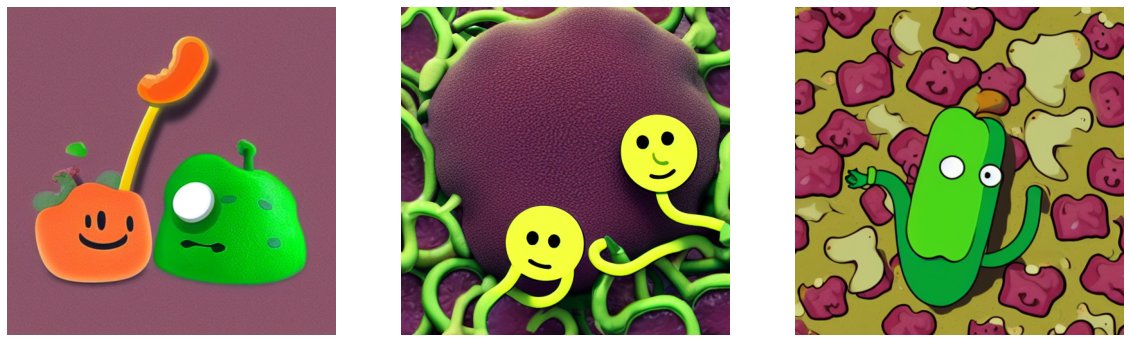

In [ ]:
### generate some examples and plot them according to our new concept and prompts
generated = stable_diffusion.text_to_image(
    f" a {placeholder_token_broccoli} with {placeholder_token_emoji} ",
    batch_size=3, num_steps = 25, seed = 2234
)
plot_images(generated)

In [ ]:
### generate some examples and plot them according to our new concept and prompts
generated = stable_diffusion.text_to_image(
    f" a happy {placeholder_token_broccoli} ",
    batch_size=3, num_steps = 25, seed =1234
)
plot_images(generated)

NameError: ignored

50/50 [==============================] - 123s 2s/step


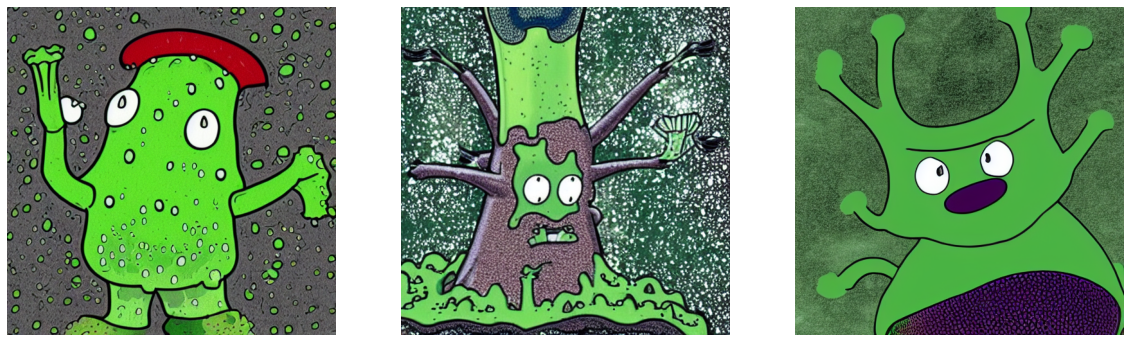

In [ ]:
generated = stable_diffusion.text_to_image(
    f"A masterpiece of a {placeholder_token_combined} crying out to the heavens. "
    f"Behind the {placeholder_token_combined}, an dark, evil shade looms over it - sucking the "
    "life right out of it.",
    batch_size=3,
)
plot_images(generated)

50/50 [==============================] - 150s 3s/step


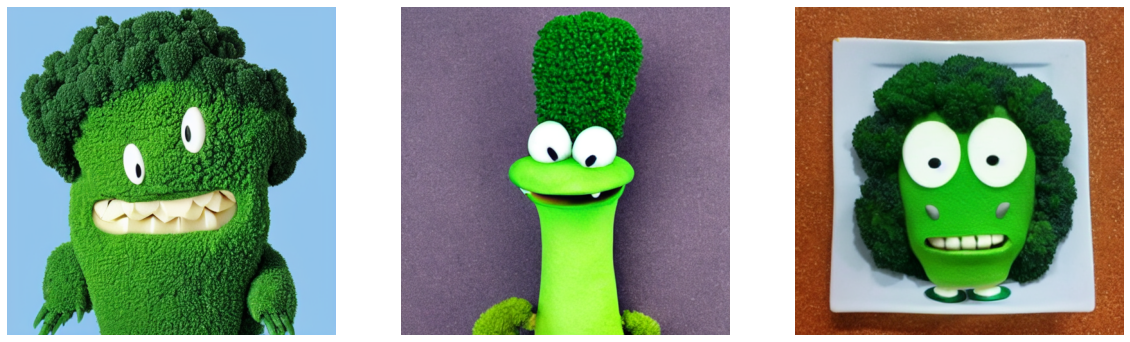

In [ ]:
generated = stable_diffusion.text_to_image(
    f" a happy {placeholder_token}.", batch_size=3
)
plot_images(generated)


50/50 [==============================] - 138s 3s/step


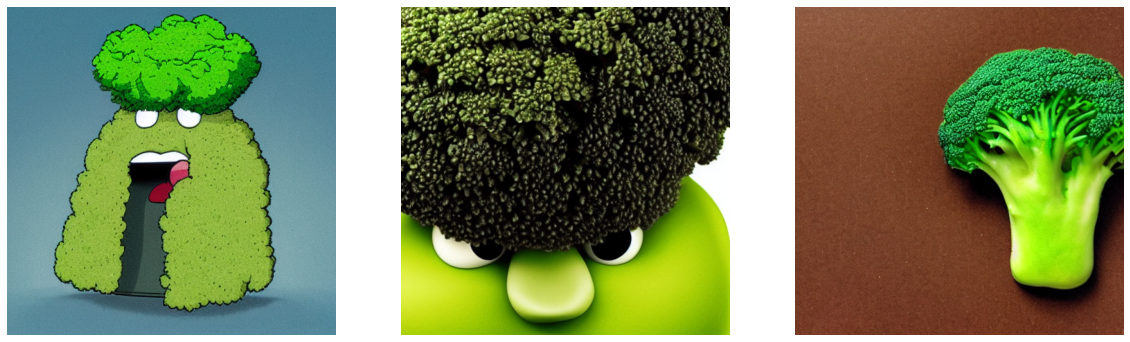

In [ ]:
generated = stable_diffusion.text_to_image(
    f" a sad {placeholder_token}.", batch_size=3
)
plot_images(generated)


50/50 [==============================] - 133s 3s/step


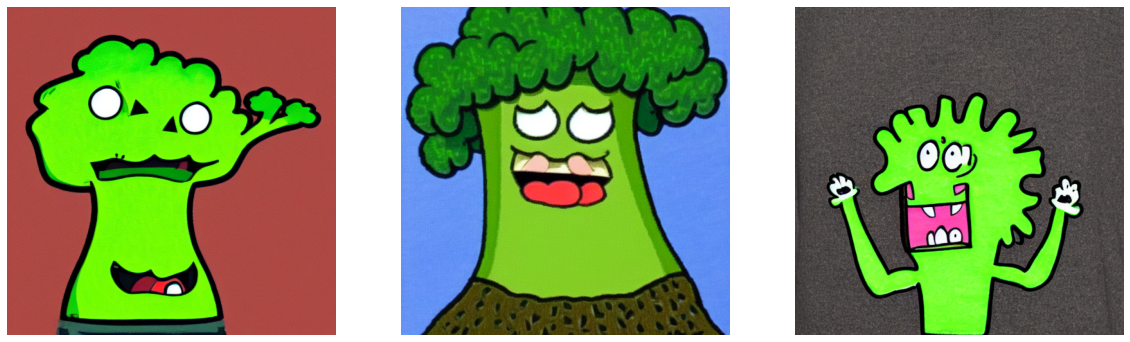

In [ ]:
generated = stable_diffusion.text_to_image(
    f" an angry {placeholder_token}.", batch_size=3
)
plot_images(generated)


50/50 [==============================] - 128s 3s/step


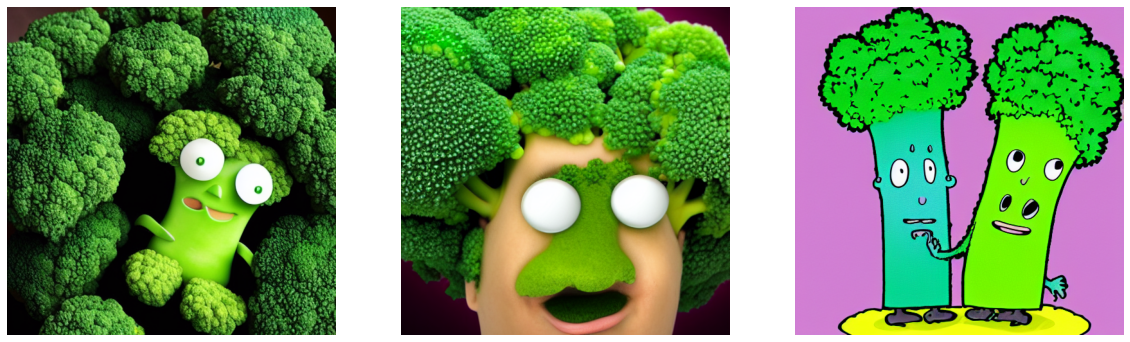

In [ ]:
generated = stable_diffusion.text_to_image(
    f"A {placeholder_token} in love",
    batch_size=3,
)
plot_images(generated)

50/50 [==============================] - 169s 3s/step


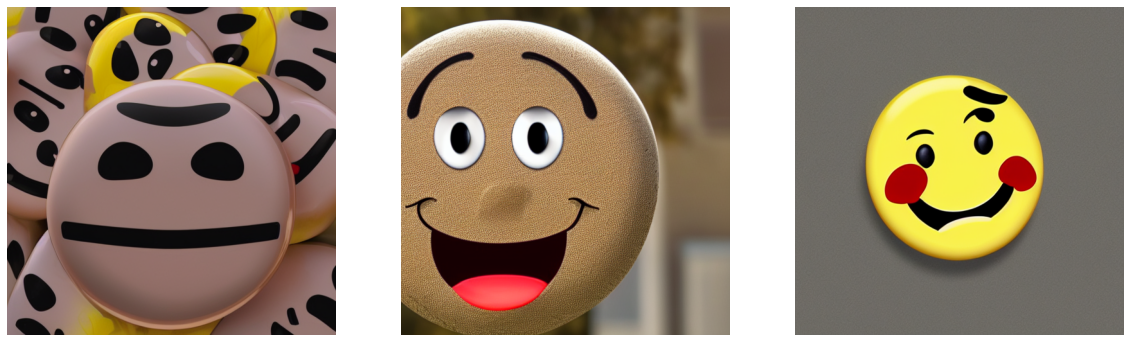

In [ ]:
generated = stable_diffusion.text_to_image(
    f"a happy emoji", seed=1337, batch_size=3
)
plot_images(generated)